In [17]:
import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("h2opes.txt", sep='\s+')
len(data)

622

max energy: -75.82541836, min energy: -76.19814929


/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_2235/153744967.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


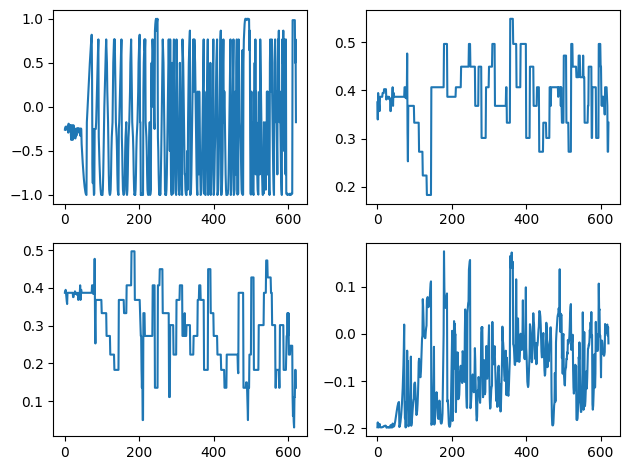

In [19]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(range(len(data)), jnp.cos(jnp.array(data["theta"]) * jnp.pi / 180))
ax[0, 1].plot(range(len(data)), jnp.exp(-jnp.array(data["r1"])))
ax[1, 0].plot(range(len(data)), jnp.exp(-jnp.array(data["r2"])))
ax[1, 1].plot(range(len(data)), data["energy"] + 76)
# ax[1, 1].set_yticks([])
fig.tight_layout()
fig.show()
max_e = max(data["energy"])
min_e = min(data["energy"])
print(f"max energy: {max_e}, min energy: {min_e}")